Practical 8 : Implement MLP for classification of handwritten digits (MNIST Dataset)


credit : https://towardsdatascience.com/classifying-handwritten-digits-using-a-multilayer-perceptron-classifier-mlp-bc8453655880

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np

# Load data
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
# Normalize intensity of images to make it in the range [0,1] since 255 is the max (white).
X = X / 255.0

In [17]:
print(X.shape)

(70000, 784)


In [18]:
# Split the data into train/test sets
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

classifier = MLPClassifier(
    hidden_layer_sizes=(50,20,10),
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)
# fit the model on the training data
classifier.fit(X_train, y_train)

Iteration 1, loss = 0.42635367
Iteration 2, loss = 0.15133481
Iteration 3, loss = 0.11926082
Iteration 4, loss = 0.10128421
Iteration 5, loss = 0.08698448
Iteration 6, loss = 0.08018627
Iteration 7, loss = 0.07544472
Iteration 8, loss = 0.06650726
Iteration 9, loss = 0.06502276
Iteration 10, loss = 0.05670472
Iteration 11, loss = 0.05228727
Iteration 12, loss = 0.05194876
Iteration 13, loss = 0.04580530
Iteration 14, loss = 0.04507070
Iteration 15, loss = 0.04141424
Iteration 16, loss = 0.03988480
Iteration 17, loss = 0.03980626
Iteration 18, loss = 0.03593785
Iteration 19, loss = 0.03619045
Iteration 20, loss = 0.03170852
Iteration 21, loss = 0.03625169
Iteration 22, loss = 0.03089518
Iteration 23, loss = 0.02846908
Iteration 24, loss = 0.02659335
Iteration 25, loss = 0.02902193
Iteration 26, loss = 0.02652245
Iteration 27, loss = 0.02556115
Iteration 28, loss = 0.02434759
Iteration 29, loss = 0.02473342
Iteration 30, loss = 0.02455680
Iteration 31, loss = 0.02841971
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50, 20, 10), learning_rate_init=0.1,
              max_iter=100, random_state=1, solver='sgd', verbose=10)

In [19]:
print("Training set score: %f" % classifier.score(X_train, y_train))
print("Test set score: %f" % classifier.score(X_test, y_test))

Training set score: 0.997467
Test set score: 0.970700


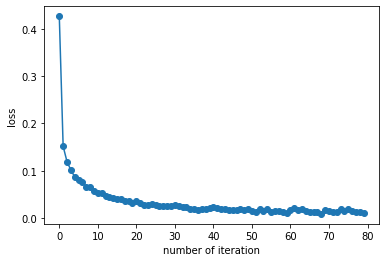

In [20]:
fig, axes = plt.subplots(1, 1)
axes.plot(classifier.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()

In [21]:
len(classifier.intercepts_) == len(classifier.coefs_) == 4

True

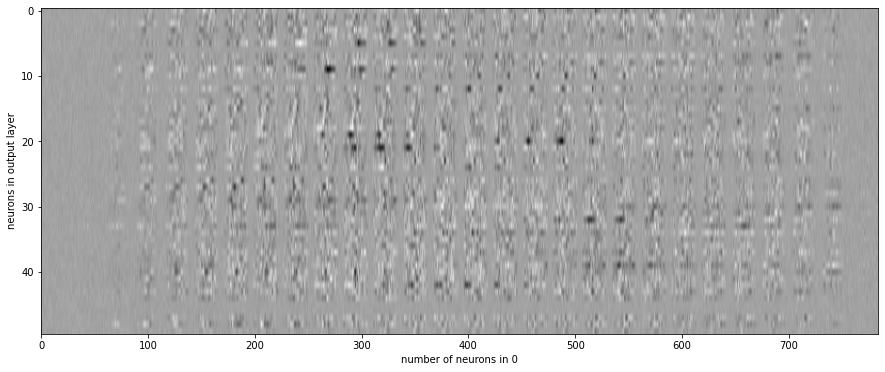

In [25]:
target_layer = 0 #0 is input, 1 is 1st hidden etc
fig, axes = plt.subplots(1, 1, figsize=(15,6))
axes.imshow(np.transpose(classifier.coefs_[target_layer]), cmap=plt.get_cmap("gray"), aspect="auto")
axes.set_xlabel(f"number of neurons in {target_layer}")
axes.set_ylabel("neurons in output layer")
plt.show()

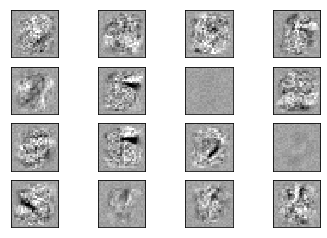

In [26]:
# choose layer to plot
target_layer = 0 #0 is input, 1 is 1st hidden etc
fig, axes = plt.subplots(4, 4)
vmin, vmax = classifier.coefs_[0].min(), classifier.coefs_[target_layer].max()
for coef, ax in zip(classifier.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()